In [4]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

`What is Convolution?  
`  
Convolution is a linear operation similar to a linear equation, dot product, or matrix multiplication. Convolution has several advantages for analyzing images. As discussed in the video, convolution preserves the relationship between elements, and it requires fewer parameters than other methods.  

You can see the relationship between the different methods that you learned:

$$linear \ equation :y=wx+b$$
$$linear\ equation\ with\ multiple \ variables \ where \ \mathbf{x} \ is \ a \ vector \ \mathbf{y}=\mathbf{wx}+b$$
$$ \ matrix\ multiplication \ where \ \mathbf{X} \ in \ a \ matrix \ \mathbf{y}=\mathbf{wX}+\mathbf{b} $$
$$\ convolution \ where \ \mathbf{X} \ and \ \mathbf{Y} \ is \ a \ tensor \  \mathbf{Y}=\mathbf{w}*\mathbf{X}+\mathbf{b}$$

In convolution, the parameter <b>w</b> is called a kernel. You can perform convolution on images where you let the variable image denote the variable X and w denote the parameter.

Create a two_dimensional convolution object by using the constructor Conv2d, the parameter <code>in_channels</code> and <code>out_channels</code> will be used for this section, and the parameter kernel_size will be three.

In [5]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)

Because the parameters in <code>nn.Conv2d</code> are randomly initialized and learned through training, give them some values.


In [6]:
conv.state_dict()['weight'][0][0] = torch.tensor([[1.0,0.0,-1.0],[2.0,0.0,-2.0],[1.0,0.0,-1.0]])
conv.state_dict()['bias'][0] = 0.0
conv.state_dict()

OrderedDict([('weight',
              tensor([[[[ 1.,  0., -1.],
                        [ 2.,  0., -2.],
                        [ 1.,  0., -1.]]]])),
             ('bias', tensor([0.]))])

In [7]:
# define dummy tensor to represent an image
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

In [8]:
z = conv(image)
z

tensor([[[[-4.,  0.,  4.],
          [-4.,  0.,  4.],
          [-4.,  0.,  4.]]]], grad_fn=<ConvolutionBackward0>)

`Stride`

In [11]:
conv1 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=2)

conv1.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv1.state_dict()['bias'][0]=0.0
conv1.state_dict()

OrderedDict([('weight',
              tensor([[[[1., 1.],
                        [1., 1.]]]])),
             ('bias', tensor([0.]))])

In [12]:
M=4
image1=torch.ones(1,1,M,M)
image1

tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])

In [14]:
z1=conv1(image1)
z1


tensor([[[[4., 4.],
          [4., 4.]]]], grad_fn=<ConvolutionBackward0>)

`Padding`

In [16]:
conv2 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=3,padding=1)

conv2.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv2.state_dict()['bias'][0]=0.0
conv2.state_dict()
z2=conv2(image1)
z2


tensor([[[[1., 2.],
          [2., 4.]]]], grad_fn=<ConvolutionBackward0>)

`Activation Function`  
Just like a neural network, we apply an activation function to the activation map.


In [17]:
# make kernel (w)
conv = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
Gx=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0,-1.0]])
conv.state_dict()['weight'][0][0]=Gx
conv.state_dict()['bias'][0]=0.0
conv.state_dict()

OrderedDict([('weight',
              tensor([[[[ 1.,  0., -1.],
                        [ 2.,  0., -2.],
                        [ 1.,  0., -1.]]]])),
             ('bias', tensor([0.]))])

In [18]:
# dataset (x)
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

In [20]:
# apply kernel or convolution on dataset
Z=conv(image)
Z

tensor([[[[-4.,  0.,  4.],
          [-4.,  0.,  4.],
          [-4.,  0.,  4.]]]], grad_fn=<ConvolutionBackward0>)

In [24]:
# Apply the activation function to the activation map. 
relu = nn.ReLU()
relu(Z)

tensor([[[[0., 0., 4.],
          [0., 0., 4.],
          [0., 0., 4.]]]], grad_fn=<ReluBackward0>)

In [25]:
# or in this way
A=torch.relu(Z)
A

tensor([[[[0., 0., 4.],
          [0., 0., 4.],
          [0., 0., 4.]]]], grad_fn=<ReluBackward0>)

`Max Pooling`

In [26]:
image1=torch.zeros(1,1,4,4)
image1[0,0,0,:]=torch.tensor([1.0,2.0,3.0,-4.0])
image1[0,0,1,:]=torch.tensor([0.0,2.0,-3.0,0.0])
image1[0,0,2,:]=torch.tensor([0.0,2.0,3.0,1.0])

image1

tensor([[[[ 1.,  2.,  3., -4.],
          [ 0.,  2., -3.,  0.],
          [ 0.,  2.,  3.,  1.],
          [ 0.,  0.,  0.,  0.]]]])

In [28]:
max1=torch.nn.MaxPool2d(2,stride=1)
max1(image1)

tensor([[[[2., 3., 3.],
          [2., 3., 3.],
          [2., 3., 3.]]]])

In [29]:
max1=torch.nn.MaxPool2d(2)
max1(image1)

tensor([[[[2., 3.],
          [2., 3.]]]])

`Multiple input and Output Channels`

In [53]:
conv1 = nn.Conv2d(in_channels=1, out_channels=3,kernel_size=3)

In [54]:
# define kernel
Gx=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
Gy=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])

conv1.state_dict()['weight'][0][0]=Gx
conv1.state_dict()['weight'][1][0]=Gy
conv1.state_dict()['weight'][2][0]=torch.ones(3,3)

In [55]:
conv1.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])
conv1.state_dict()['bias']

tensor([0., 0., 0.])

In [56]:
for x in conv1.state_dict()['weight']:
    print(x)

tensor([[[ 1.,  0., -1.],
         [ 2.,  0., -2.],
         [ 1.,  0., -1.]]])
tensor([[[ 1.,  2.,  1.],
         [ 0.,  0.,  0.],
         [-1., -2., -1.]]])
tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])


In [57]:
# dataset
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

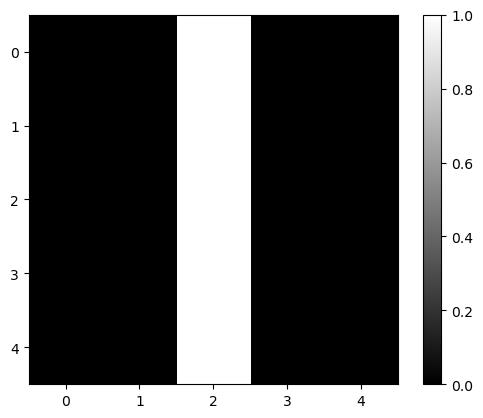

In [58]:
plt.imshow(image[0,0,:,:].numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar()
plt.show()

In [59]:
out=conv1(image)
out.shape

torch.Size([1, 3, 3, 3])

The result is a 1x3x3x3 tensor. This represents one sample with three channels, and each channel contains a 3x3 image.  The same rules that govern the shape of each image were discussed in the last section.

tensor([[-4.,  0.,  4.],
        [-4.,  0.,  4.],
        [-4.,  0.,  4.]], grad_fn=<UnbindBackward0>)


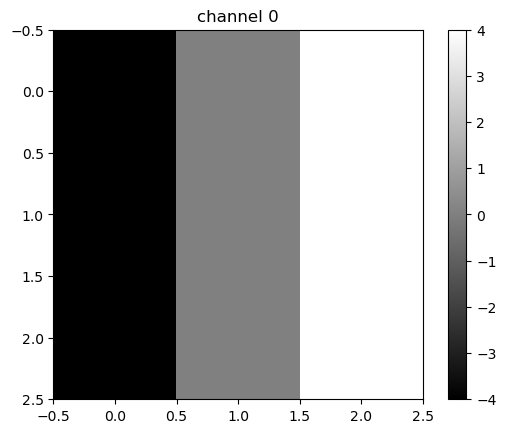

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


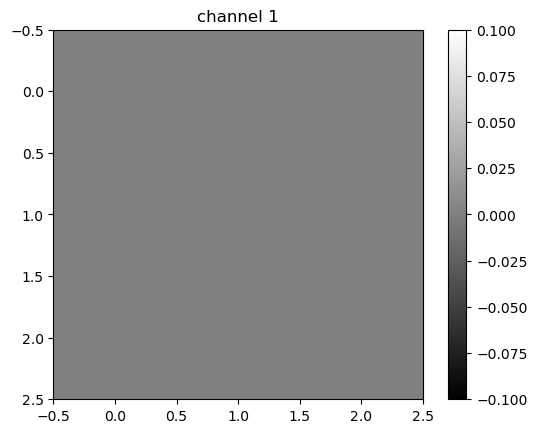

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


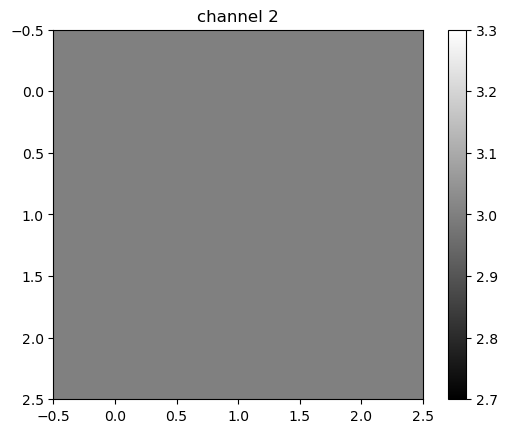

In [60]:
for channel,image in enumerate(out[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

Different kernels can be used to detect various features in an image. 

tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])


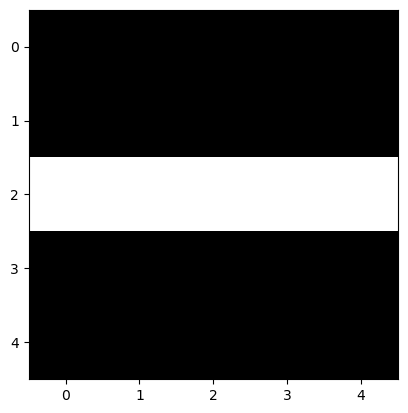

In [62]:
image1=torch.zeros(1,1,5,5)
image1[0,0,2,:]=1
print(image1)
plt.imshow(image1[0,0,:,:].detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.show()

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


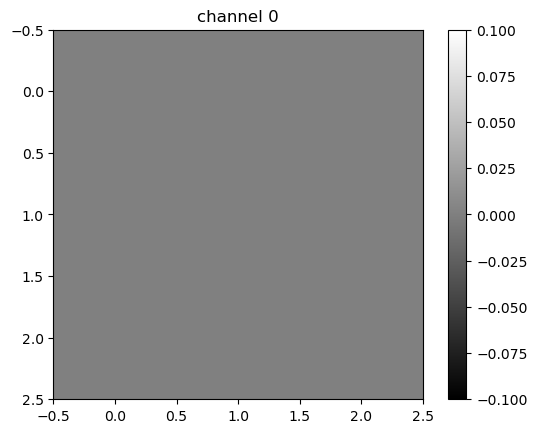

tensor([[-4., -4., -4.],
        [ 0.,  0.,  0.],
        [ 4.,  4.,  4.]], grad_fn=<UnbindBackward0>)


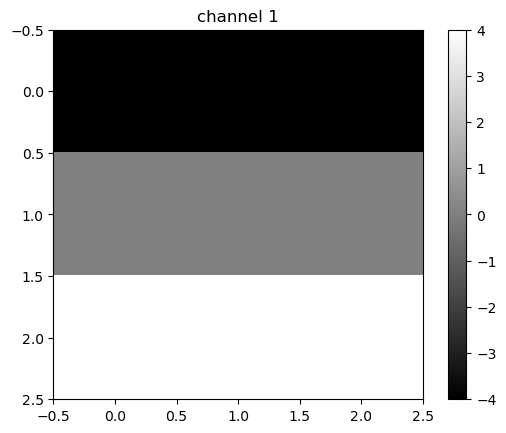

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


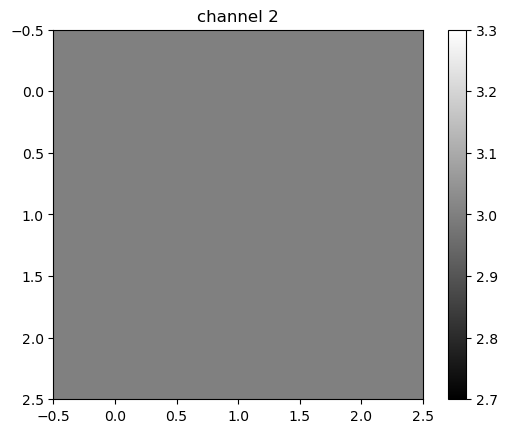

In [63]:
out1=conv1(image1)
for channel,image in enumerate(out1[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

`Deep CNN`